In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [6]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [7]:
 y_true = (0.5 * x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [11]:
y_df.head()

,Y
0,4.385306
1,4.491344
2,4.536454
3,5.591967
4,5.625155


In [12]:
my_data = pd.concat([x_df,y_df], axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,4.385306
1,0.00001,4.491344
2,0.00002,4.536454
3,0.00003,5.591967
4,0.00004,5.625155


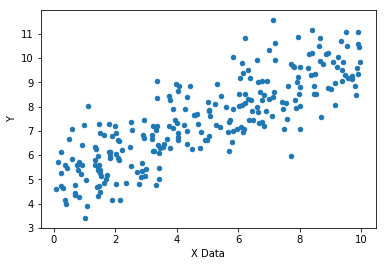

In [15]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y')

In [16]:
batch_size = 8

In [17]:
np.random.randn(2)

array([ 0.68487628, -1.07779563])

In [18]:
m = tf.Variable(0.68)
b = tf.Variable(1.07)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
xph = tf.placeholder(tf.float32,[batch_size])

In [20]:
yph = tf.placeholder(tf.float32,[batch_size])

In [21]:
y_model = m*xph + b

In [22]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [24]:
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_int = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_int], yph:y_true[rand_int]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [33]:
model_m

0.5063692

In [34]:
model_b

4.997645

In [35]:
y_hat = model_m*x_data + model_b

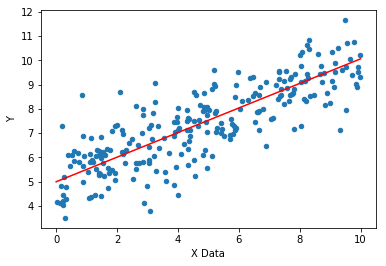

In [36]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')